# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Big Data** </center>
---
### <center> **Spring 2025** </center>
---
**Mid-term exam**

**Date**: 3/12/2025

**Student Name**: Konrad Schindler

**Professor**: Pablo Camarillo Ramirez

In [98]:
import findspark
findspark.init()

In [99]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkSQL-Exam-1-Konrad-Schindler") \
    .master("spark://0638c7435d1d:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

### Step 1

In [100]:
import foraneos.spark_utils as SpU
from pyspark.sql.functions import when

product_columns = [ ("product_id", "int", True),
                ("product_name", "string", True),
                ("category", "string", True),
                ("price", "float", True)
                ]

product_schema = SpU.SparkUtils.generate_schema(product_columns)

# Create DataFrame
products_df = spark \
                .read \
                .schema(product_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/exam_P2025_ESI3914N/products.csv")
                

sales_columns = [ ("transaction_id", "int", True),
                ("product_id", "int", True),
                ("customer_id", "int", True),
                ("sale_amount", "float", True),
                ("sale_date", "date", True)
                ]

sales_schema = SpU.SparkUtils.generate_schema(sales_columns)

           
# Create DataFrame
sales_df = spark \
                .read \
                .schema(sales_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/exam_P2025_ESI3914N/sales.csv")
                
        

### Step 2


In [101]:
product_sales = sales_df.join(products_df, 
      sales_df["product_id"] == products_df["product_id"], 
      "left").drop('product_id')



### Step 3


In [102]:
sales_per_category = product_sales.groupBy("category").sum("sale_amount")


### Step 4

In [103]:
product_sales_types = product_sales.withColumn('sale_type', when(product_sales['sale_amount'] > 50, "High").otherwise("Low"))


### Step 5


In [104]:
electronics = product_sales_types.filter(product_sales_types["category"] == "Electronics")


In [105]:
electronics_select = electronics.select("product_name", "sale_amount", "sale_type")

In [106]:
electronics_select.show(n=5)
print(electronics_select.count())


+------------+-----------+---------+
|product_name|sale_amount|sale_type|
+------------+-----------+---------+
| Product 100|      55.14|     High|
| Product 100|     694.06|     High|
| Product 100|      64.41|     High|
| Product 100|     472.98|     High|
| Product 100|     228.41|     High|
+------------+-----------+---------+
only showing top 5 rows

612


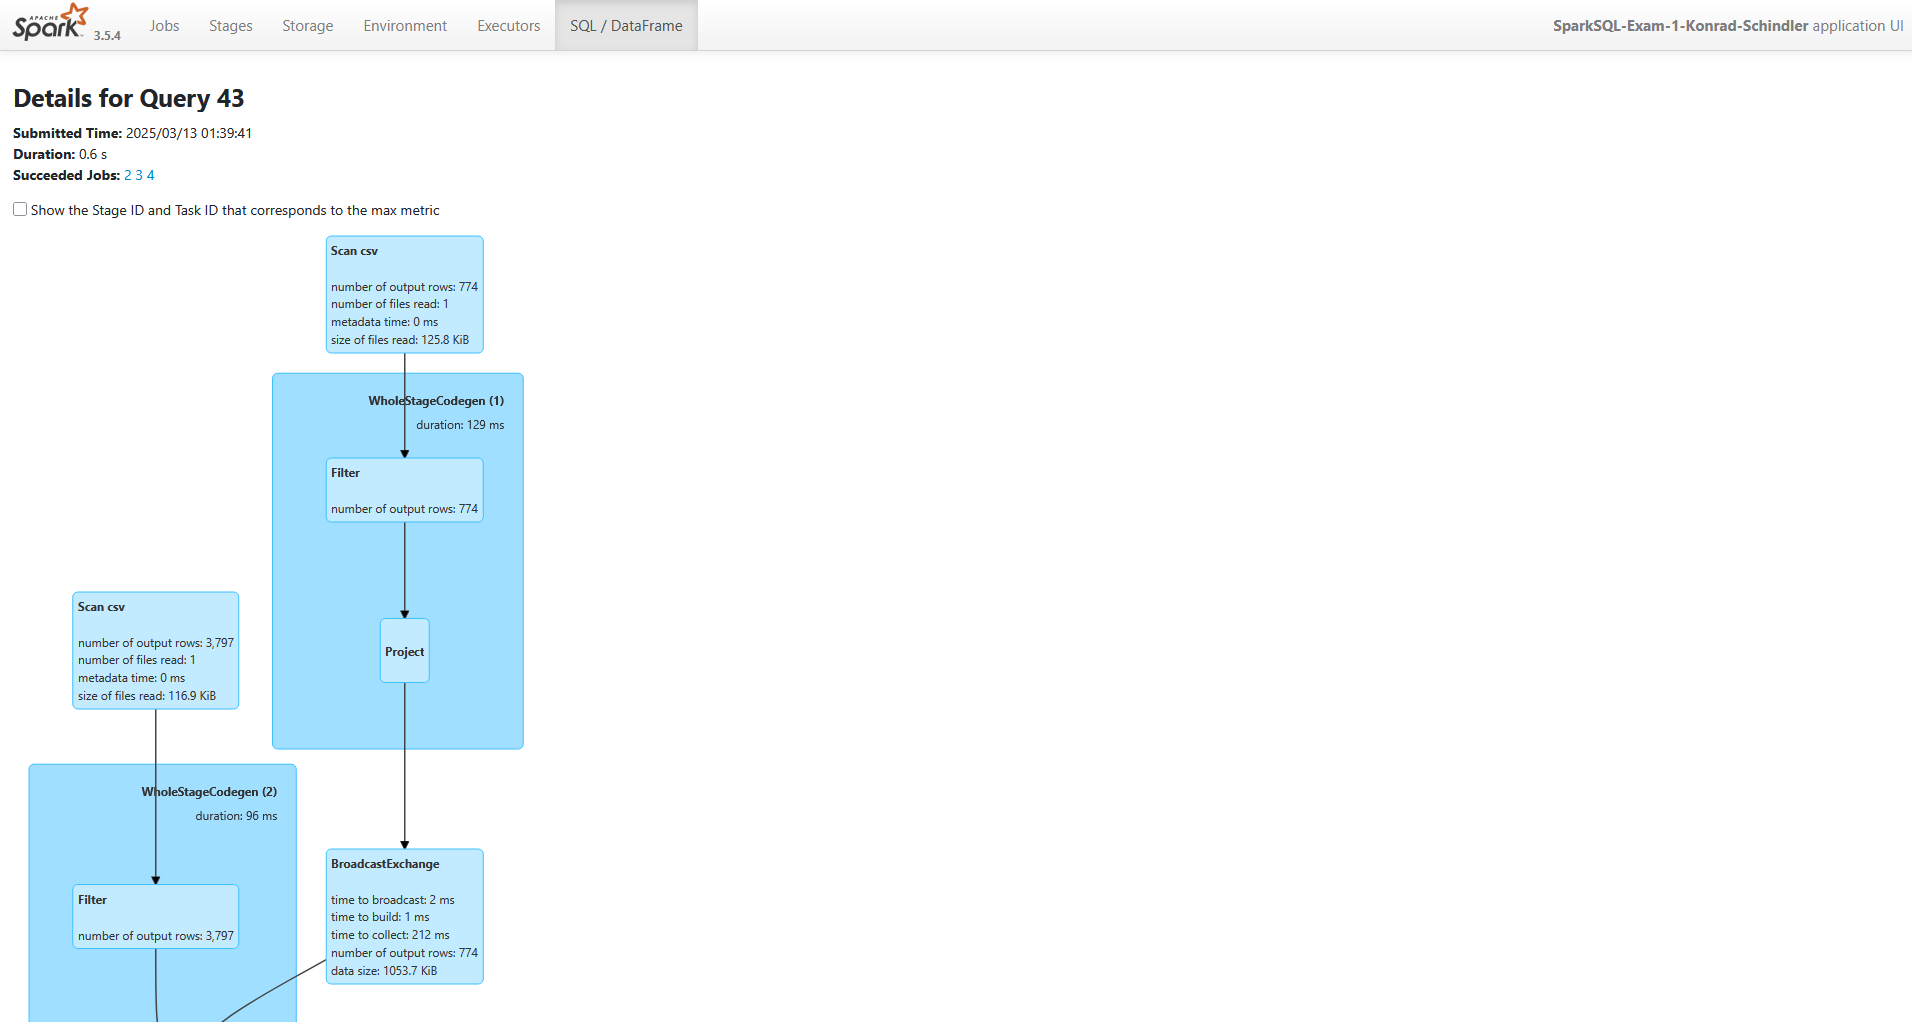

In [108]:
# Stop Spark
sc.stop()